In [ ]:
!nvidia-smi

Tue Dec  3 13:50:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.7 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
use_refiner = False

In [ ]:
import mediapy as media
import random
import sys
import torch
import os

from diffusers import DiffusionPipeline

# Check if CUDA is available before attempting to use it
if torch.cuda.is_available():
    print("GPU is available")
    device = "cuda"
else:
    print("GPU is NOT available, using CPU instead")
    device = "cpu"

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)

# Now, use the 'device' variable when moving the model
pipe = pipe.to(device)

# ... (rest of your code, replacing "cuda" with 'device')

GPU is NOT available, using CPU instead


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

In [ ]:
# prompt = "a photo of Pikachu fine dining with a view to the Eiffel Tower"
prompt = "a photo of beautiful shri ram and sita "
# prompt ="19-year-old woman” by Steve McCurry, 35mm, F/2.8, insanely detailed and intricate, character, hypermaximalist, elegant, ornate, beautiful, exotic, revealing, appealing, attractive, amative, hyper-realistic, super detailed, popular on Flickr"
# prompt = "Full body portrait of a beutiful and sexy young woman. She is swedish and wears a Skim dress. She is 18. Large eyes, large lips, small nose, summer evening. Looks like Christina Hendricks. Photograph taken with Canon EOS R3."
# prompt = "Portrait of a beutiful young woman. She is swedish and wears a tight black dress. She is 18."
# prompt = "A photo of beautiful harry potter"
# prompt="solar eclipse!, Nicolas Delort, splash art, reverse graffiti, Alex Maleev, Yoji Shinkawa, professional ominous concept art, by artgerm and greg rutkowski, an intricate, elegant, highly detailed digital painting, concept art, smooth, sharp focus, illustration, in the style of simon stalenhag, wayne barlowe, and igor kieryluk."
#prompt ="Fairy multilayered tree house in world tree, decorating flowers, mirror water, mysterious fog, scatter drawing, Complex, multilayered fortress, sunset, another world, lingt art, detail, 32k resolution, oil painting, hyperrealism, Award-winning"
#prompt = "garden, 5'3 feet girl, indian skin body, black eye lens, little bit long hair, school dress that include blue frock and half sleeves shirt that has white line on blue shirt, left side VBES name badge, white socks, black girl shoe"
prompt1="Palace, 5'8 feet man, american skin body, blue eye lens, medium hair, white shirt, black blazzer that include black pant, also white horse"
prompt2="Imagine your ideal dream home, a place where you can create the perfect living environment for yourself and your family. Describe this dream home in vivid detail, from its location and architectural style to its interior design and features. What makes it your dream home? How does it reflect your personal tastes, lifestyle, and aspirations? Explore every aspect of this dream home, from the layout of the rooms to the outdoor spaces and amenities. Let your imagination run wild and paint a picture of your dream home that captures your vision of the perfect place to live."
prompt3= "Beyond the walls of your dream home, what does your outdoor paradise look like? Describe the landscape design, gardens, and outdoor amenities that surround your dream house. Is there a sparkling pool, a lush green lawn, or a tranquil patio where you can relax? How does the outdoor space enhance your overall living experience?"
# prompt4="human genome labrotary where a scientist making experiment on pink colour gene in white cat and light blue colour dog."
seed = random.randint(0, sys.maxsize)

images = pipe(
    prompt = prompt,
    output_type = "latent" if use_refiner else "pil",
    generator = torch.Generator(device).manual_seed(seed),
    ).images

if use_refiner:
  images = refiner(
      prompt = prompt,
      image = images,
      ).images

  images = refiner(
      prompt1 = prompt1,
      image1 = images,
      ).images

  images = refiner(
      prompt2 = prompt2,
      image2 = images,
      ).images

  # images = refiner(
  #     prompt3 = prompt3
  #     image = images,
  #     ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
print(f"Prompt1:\t{prompt1}\nSeed:\t{seed}")
print(f"Prompt2:\t{prompt2}\nSeed:\t{seed}")
print(f"Prompt3:\t{prompt3}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")
images[1].save("output1.jpg")
images[2].save("output2.jpg")
# images[3].save("output3.jpg")
print('')

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


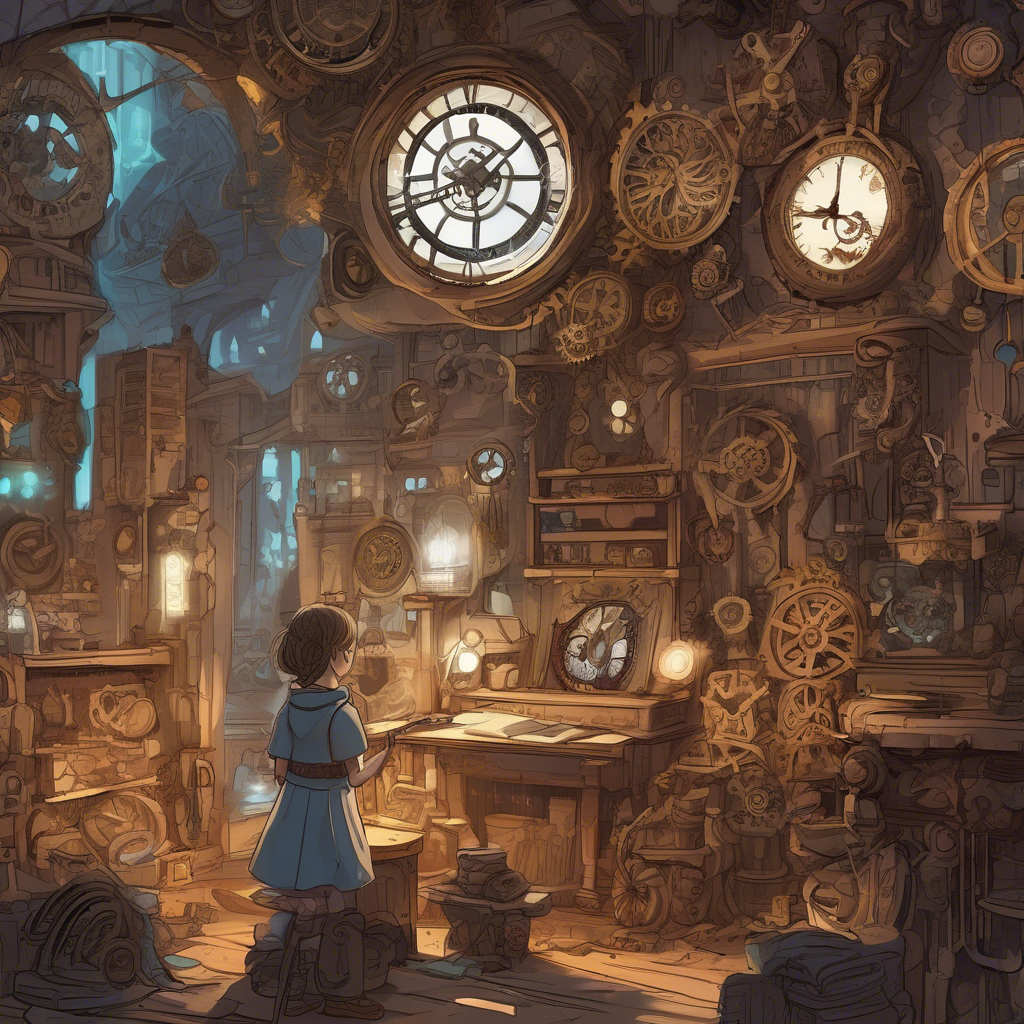

Prompt 0:	A cozy, cluttered room filled with intricate clock parts, glowing gears, and Elara examining the mystical Chronos Key 
Seed:	3247766453523857936



  0%|          | 0/50 [00:00<?, ?it/s]


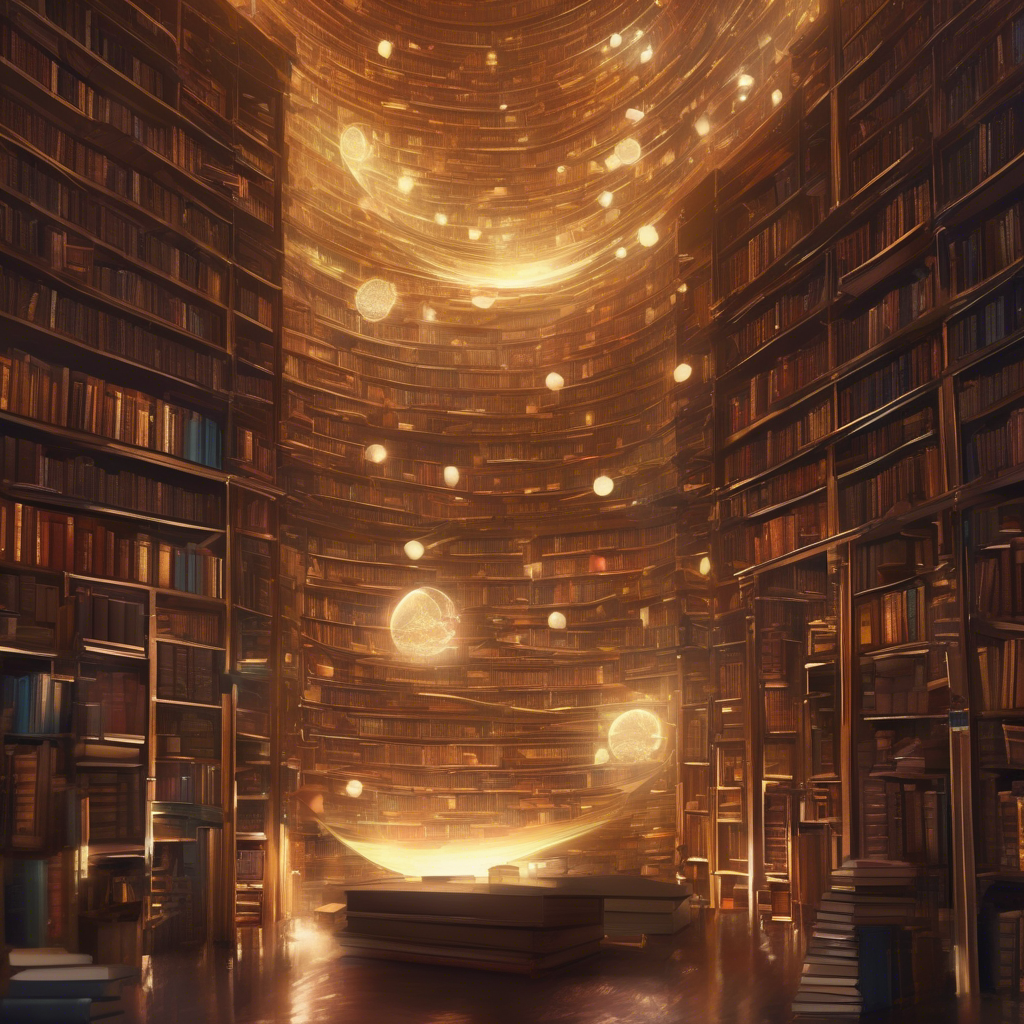

Prompt 1:	A boundless library floating in the void, with bookshelves spiraling infinitely, lit by hovering, glowing orbs.
Seed:	4063782967878141432



  0%|          | 0/50 [00:00<?, ?it/s]


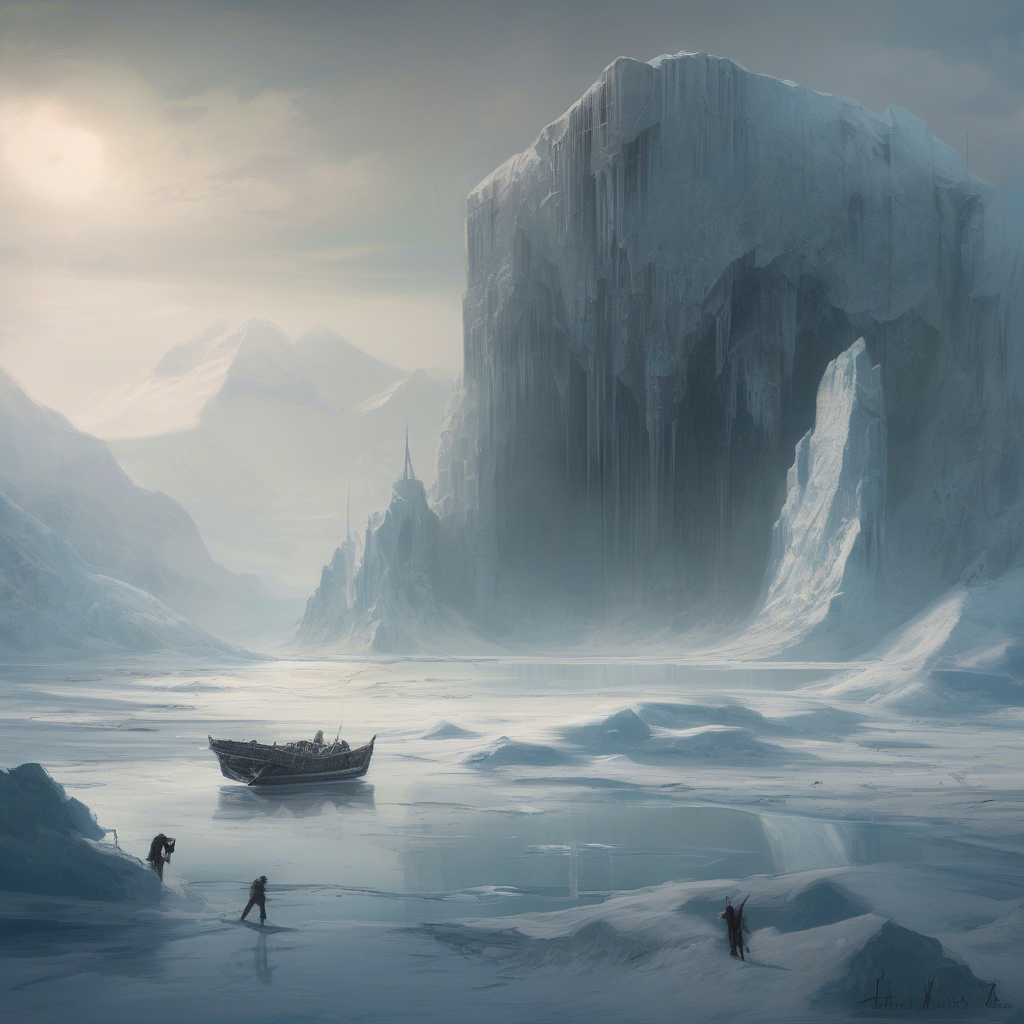

Prompt 2:	A land locked in perpetual winter, where an ancient frozen titan lies dormant beneath a sheet of ice
Seed:	6217625166782573179



  0%|          | 0/50 [00:00<?, ?it/s]


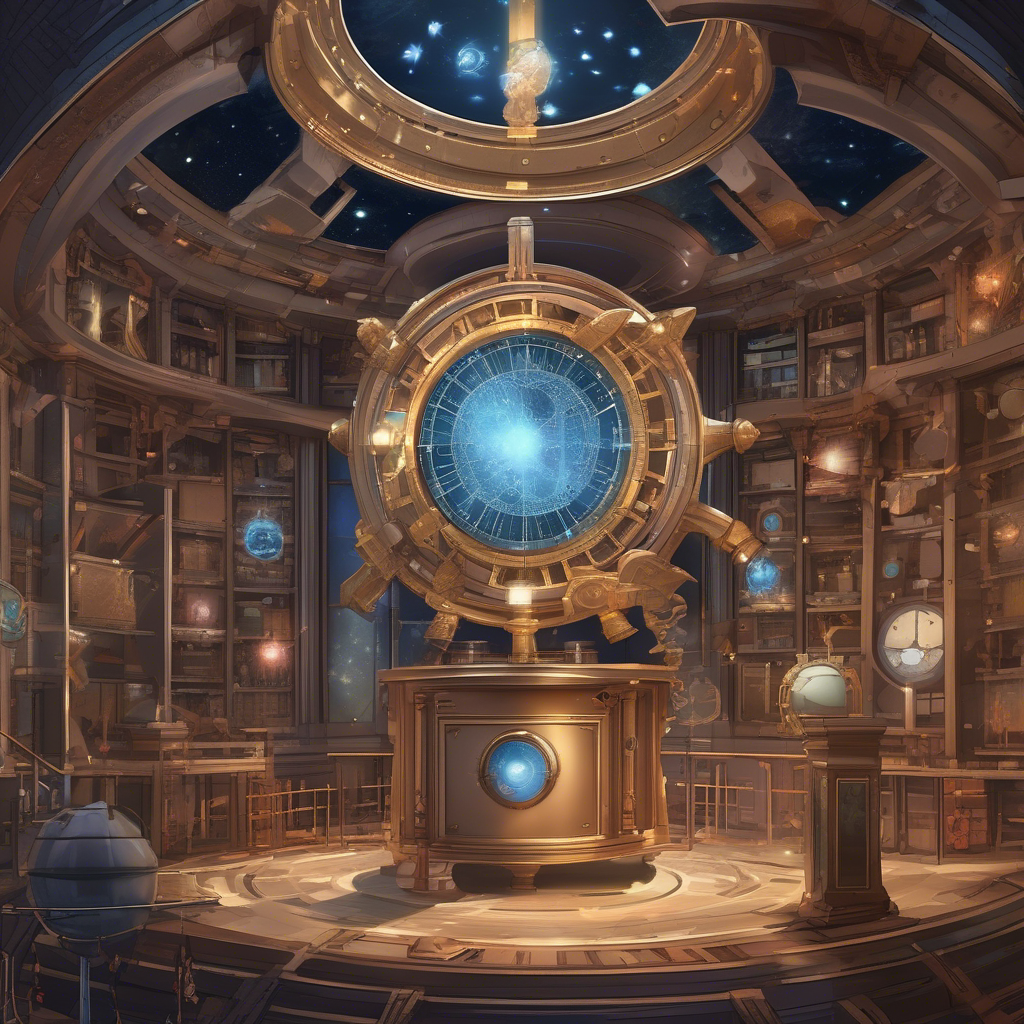

Prompt 3:	A grand celestial observatory with floating gears, glowing star charts, and a massive time portal.
Seed:	1837519085446033432





In [6]:
import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)

# Flag to use the refiner (currently set to False)
use_refiner = False


if use_refiner:
  refiner = DiffusionPipeline.from_pretrained(
      "stabilityai/stable-diffusion-xl-refiner-1.0",
      text_encoder_2=pipe.text_encoder_2,
      vae=pipe.vae,
      torch_dtype=torch.float16,
      use_safetensors=True,
      variant="fp16",
  )

  refiner = refiner.to("cuda")
  pipe.enable_model_cpu_offload()



else:
  pipe = pipe.to("cuda")

# Define your prompts
prompts = ["A cozy, cluttered room filled with intricate clock parts, glowing gears, and Elara examining the mystical Chronos Key ",
    "A boundless library floating in the void, with bookshelves spiraling infinitely, lit by hovering, glowing orbs.",
    "A land locked in perpetual winter, where an ancient frozen titan lies dormant beneath a sheet of ice",
   "A grand celestial observatory with floating gears, glowing star charts, and a massive time portal.",
        # Add more prompts as needed
]

# Generate images for each prompt
images = []
for i, prompt in enumerate(prompts):
    seed = random.randint(0, sys.maxsize)
    generated_image = pipe(
        prompt=prompt,
        output_type="latent" if use_refiner else "pil",
       generator=torch.Generator("cuda").manual_seed(seed),
    ).images[0]  # Get the first (and usually only) image
    images.append(generated_image)
    media.show_image(generated_image)
    print(f"Prompt {i}:\t{prompt}\nSeed:\t{seed}\n")

# Display and save images
#media.show_images(images)
for i, image in enumerate(images):
    image.save(f"/n output{i}.jpg")
print('\n')